In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.style as sts
import math
import time
from IPython import display
sts.use('ggplot')

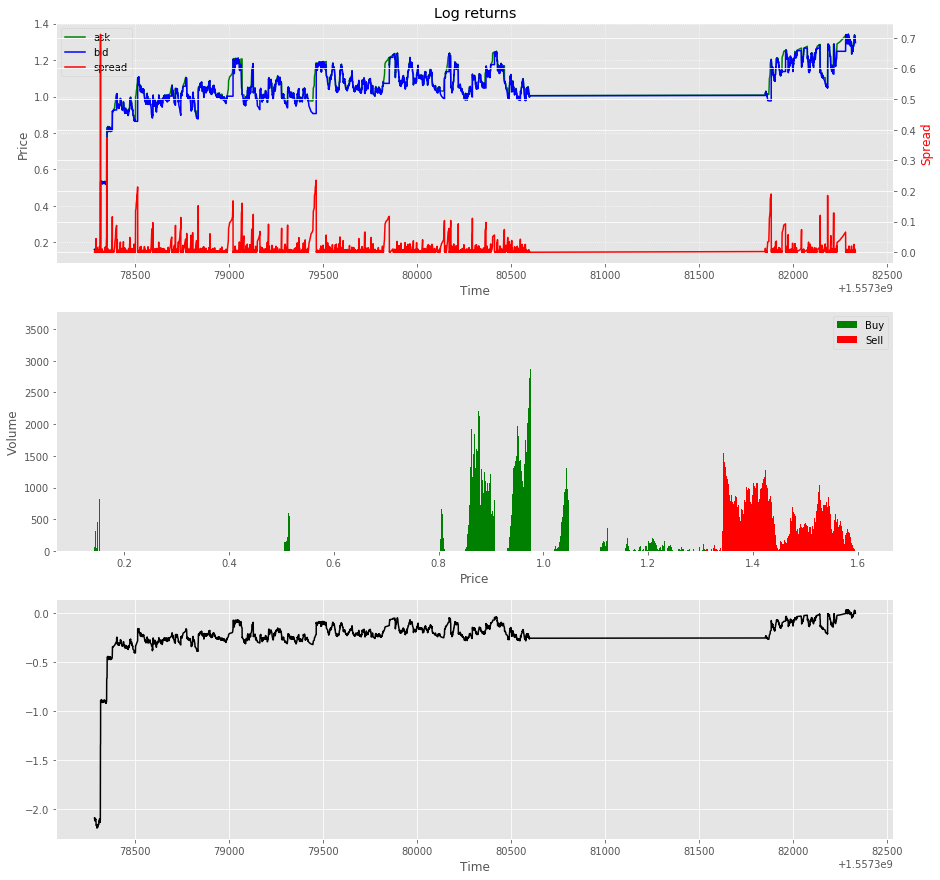

KeyboardInterrupt: 

In [12]:
for i in range(1000):
    feed = pd.read_csv("../feed.csv", header=None, error_bad_lines=False, warn_bad_lines=False)
    snapshot = pd.read_csv("../snapshot.csv", header=None, error_bad_lines=False, warn_bad_lines=False)

    feed.sort_values([0], inplace=True)
    
    t = feed[0]
    bid = feed[1]
    ask = feed[2]
    spread = (ask - bid)/ask
    mid = (ask + bid)/2
    log_ret = np.log(mid) - np.log(mid.iloc[-1])
    
    
    bid_side = snapshot[snapshot[0] == 0]
    ask_side = snapshot[snapshot[0] == 1]
    
    # Plot historical data
    fig, (ax_t, ax_md, ax_lr) = plt.subplots(3,1, figsize=(15,15))
    ax_t.plot(t, ask, color='green', label='ask')
    ax_t.plot(t, bid, color='blue', label='bid')
    ax_t.plot(np.nan, color='red', label='spread')
    ax_t.set_xlabel('Time')
    ax_t.set_ylabel('Price')
    ax_t.legend(loc=0)
    ax_t.grid(linestyle=':')
    
    ax_s = ax_t.twinx()
    ax_s.plot(t, spread, color='red', label='spread')
    ax_s.set_ylabel(ylabel='Spread', color='red')
    plt.title('Historical prices')
    
    # Plot market depth
    ax_md.grid()
    ax_md.bar(bid_side[1], bid_side[2], 0.001, color='green', label='Buy')
    ax_md.bar(ask_side[1], ask_side[2], 0.001, color='red', label='Sell')
    ax_md.legend(loc=0)
    ax_md.set_xlabel('Price')
    ax_md.set_ylabel('Volume')
    plt.title('Market depth')
    
    # Plot log returns
    ax_lr.plot(t, log_ret, color='black', label='Log returns')
    ax_lr.set_xlabel(xlabel='Time')
    plt.title('Log returns')
    
    plt.show()
    time.sleep(10.0)
    display.clear_output(wait=True)
    display.display(plt.gcf())

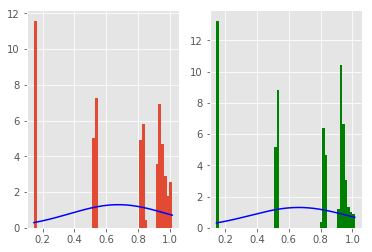

In [4]:
ask_overlay = np.linspace(np.min(ask),np.max(ask),ask.size)
bid_overlay = np.linspace(np.min(bid),np.max(bid),bid.size)

ask_mean, ask_sd = norm.fit(ask)
bid_mean, bid_sd = norm.fit(bid)

ask_pdf = norm.pdf(ask_overlay,ask_mean,ask_sd)
bid_pdf = norm.pdf(bid_overlay,bid_mean,bid_sd)

fig,(ax_ask,ax_bid) = plt.subplots(1,2)
ax_ask.hist(np.array(ask), bins=50, density=True)
ax_bid.hist(np.array(bid), bins=55, density=True, color='green')
ax_ask.plot(ask_overlay, ask_pdf, 'b')
ax_bid.plot(bid_overlay, bid_pdf, 'b')
plt.show()

In [6]:
np.corrcoef(bid,ask)

array([[1.        , 0.98619255],
       [0.98619255, 1.        ]])

In [7]:
bid.kurtosis()

-1.083017732012737

In [8]:
bid.skew()

-0.6637101390770245

In [9]:
ask.kurtosis()

-1.0133875040196774

In [10]:
ask.skew()

-0.7002086280730638

In [11]:
bid.skew()

-0.6637101390770245